# CNN for CIFAR Dataset

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import random
import matplotlib.pyplot as plt

In [ ]:
## Load the CIFAR dataset

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
## Normalize the data.

x_train = x_train/255
x_test = x_test/255

In [ ]:
# One-hot encode the labels as the data here is categorical ans sometimes the original numerical values may lead
# to a continous value prediction. Also catogrical data in most cases is not numerical so one-hot encoding is
# always a good practice.

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

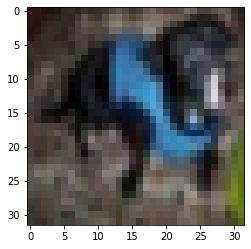

In [ ]:
plt.imshow(x_train[27])

In [ ]:
y_train[27]

array([5], dtype=uint8)

In [ ]:
class_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels[y_train[27][0]]

'dog'

In [ ]:
## Create the model.

model = Sequential()

## Here padding asd stride have been left as default  i.e. padding='valid' and stride=(1,1), so not passing here.
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

## Adding a pooling layer.
model.add(MaxPool2D(pool_size=(2, 2)))

## Add more layers
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

## Now we need to flatten the images as the penultimate layer should be a dense (fully connected) layer.
model.add(Flatten())

## Now add the dense layer.
model.add(Dense(256,activation='relu'))

## Output Layer, Softmax --> Multi class.
model.add(Dense(10,activation='softmax'))

In [ ]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

# Instantiate a loss function.
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_cat_train))
train_dataset = train_dataset.batch(batch_size)

In [ ]:
epochs = 15
for epoch in range(epochs):
      print('Start of epoch', epoch)

      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables autodifferentiation.
        with tf.GradientTape() as tape:

              # Run the forward pass of the layer.
              # The operations that the layer applies
              # to its inputs are going to be recorded
              # on the GradientTape.
              logits = model(x_batch_train, training=True)  # Logits for this minibatch

              # Compute the loss value for this minibatch.
              loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            preds = to_categorical(preds)
            acc = tf.reduce_mean(tf.cast(tf.equal(preds, y_batch_train),
                                 tf.float32))
            print("Loss: {} Accuracy: {}".format(loss_value, acc))

Start of epoch 0
Loss: 2.3024587631225586 Accuracy: 0.809374988079071
Loss: 2.07576322555542 Accuracy: 0.878125011920929
Loss: 2.1276683807373047 Accuracy: 0.8656250238418579
Loss: 2.1532516479492188 Accuracy: 0.859375
Start of epoch 1
Loss: 2.007000207901001 Accuracy: 0.887499988079071
Loss: 1.9513062238693237 Accuracy: 0.90625
Loss: 2.07035493850708 Accuracy: 0.878125011920929
Loss: 2.0616860389709473 Accuracy: 0.875
Start of epoch 2
Loss: 1.964347004890442 Accuracy: 0.8968750238418579
Loss: 1.8747167587280273 Accuracy: 0.9156249761581421
Loss: 2.017331600189209 Accuracy: 0.890625
Loss: 2.037397623062134 Accuracy: 0.8812500238418579
Start of epoch 3
Loss: 1.9186968803405762 Accuracy: 0.9125000238418579
Loss: 1.8522837162017822 Accuracy: 0.921875
Loss: 1.9545905590057373 Accuracy: 0.903124988079071
Loss: 2.028963565826416 Accuracy: 0.8812500238418579
Start of epoch 4
Loss: 1.8712196350097656 Accuracy: 0.918749988079071
Loss: 1.8776434659957886 Accuracy: 0.909375011920929
Loss: 1.93878

### So the training set accuracy is at around 95%

# Test accuracy on validation data

In [ ]:
# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_cat_test))
val_dataset = val_dataset.batch(128)

val_acc_metric = tf.keras.metrics.CategoricalAccuracy()

# Run a validation loop at the end of each epoch.
for x_batch_val, y_batch_val in val_dataset:
    val_logits = model(x_batch_val)
    # Update val metrics
    val_acc_metric(y_batch_val, val_logits)
val_acc = val_acc_metric.result()
val_acc_metric.reset_states()
print('Validation accuracy :', float(val_acc))

Validation accuracy : 0.6341999769210815


## Let's make some predictions

In [ ]:
random_test_data = []
for x in range(5):
    random_test_data.append(random.randrange(1, 10000))

In [ ]:
random_test_data

[8185, 6462, 74, 8192, 286]

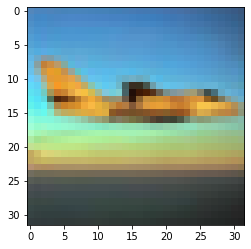

Model Prediction: airplane
Actual class label: airplane


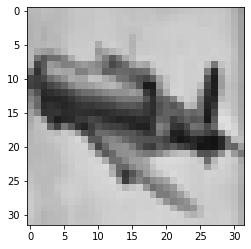

Model Prediction: airplane
Actual class label: airplane


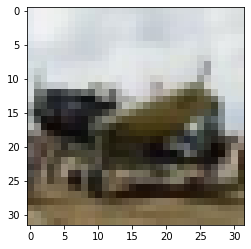

Model Prediction: airplane
Actual class label: airplane


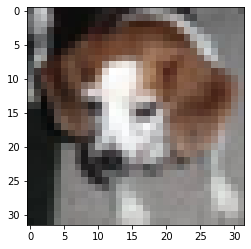

Model Prediction: dog
Actual class label: dog


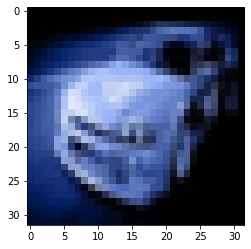

Model Prediction: automobile
Actual class label: automobile


In [ ]:
for x in range(5):
    plt.imshow(x_test[random_test_data[x]].reshape(32,32,3),cmap='Blues')
    plt.show()
    predictions = model.predict_classes(x_test[random_test_data[x]].reshape(1,32,32,3))
    print('Model Prediction:', class_labels[predictions[0]])
    print('Actual class label:', class_labels[y_test[random_test_data[x]][0]])

In [ ]:
# Sanity Check: CNN for MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
## Load the MNIST dataset

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
# One-hot encode the labels as the data here is categorical ans sometimes the original numerical values may lead
# to a continous value prediction. Also catogrical data in most cases is not numerical so one-hot encoding is
# always a good practice.

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
## Normalize the data.

x_train = x_train/255
x_test = x_test/255

In [ ]:
# Reshape the images to identify that the images are gray scale. Not required here but good for readability, inference
# and to have an overall standard framework.

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
## Create the model.

model = Sequential()

## Here padding asd stride have been left as default  i.e. padding='valid' and stride=(1,1), so not passing here.
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

## Adding a pooling layer.
model.add(MaxPool2D(pool_size=(2, 2)))

## Now we need to flatten the images as the penultimate layer should be a dense (fully connected) layer.
model.add(Flatten())

## Now add the dense layer.
model.add(Dense(128,activation='relu'))

## Output Layer, Softmax --> Multi class.
model.add(Dense(10,activation='softmax'))

In [ ]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

# Instantiate a loss function.
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
## Prepare the test dataset
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_cat_train))
train_dataset = train_dataset.batch(batch_size)

In [ ]:
## Select the number of epocs.
epochs = 3
for epoch in range(epochs):
      print('Start of epoch', epoch)

      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables autodifferentiation.
        with tf.GradientTape() as tape:

              # Run the forward pass of the layer.
              # The operations that the layer applies
              # to its inputs are going to be recorded
              # on the GradientTape.
              logits = model(x_batch_train, training=True)  # Logits for this minibatch

              # Compute the loss value for this minibatch.
              loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 100 batches.
        if step % 100 == 0:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            preds = to_categorical(preds)
            acc = tf.reduce_mean(tf.cast(tf.equal(preds, y_batch_train),
                                 tf.float32))
            print("Loss: {} Accuracy: {}".format(loss_value, acc))

Start of epoch 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Loss: 2.3065381050109863 Accuracy: 0.8046875
Loss: 1.5552563667297363 Accuracy: 0.9859374761581421
Loss: 1.527345895767212 Accuracy: 0.987500011920929
Loss: 1.5189239978790283 Accuracy: 0.9906250238418579
Loss: 1.5154380798339844 Accuracy: 0.989062488079071
Start of epoch 1
Loss: 1.4861390590667725 Accuracy: 0.995312511920929
Loss: 1.4877920150756836 Accuracy: 0.995312511920929
Loss: 1.4981956481933594 Accuracy: 0.995312511920929
Loss: 1.482128620147705 Accuracy: 0.996874988079071
Loss:

### So, here the train set accuracy is 99.8%

## Validation over test data

In [ ]:
# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_cat_test))
val_dataset = val_dataset.batch(128)

val_acc_metric = tf.keras.metrics.CategoricalAccuracy()

In [ ]:
# Run a validation loop at the end of each epoch.
for x_batch_val, y_batch_val in val_dataset:
    val_logits = model(x_batch_val)
    # Update val metrics
    val_acc_metric(y_batch_val, val_logits)
val_acc = val_acc_metric.result()
val_acc_metric.reset_states()
print('Validation accuracy :', float(val_acc))

Validation accuracy : 0.9828000068664551


In [ ]:
random_test_data = []
for x in range(5):
    random_test_data.append(random.randrange(1, 10000))

In [ ]:
random_test_data

[2153, 7374, 6868, 1348, 2226]

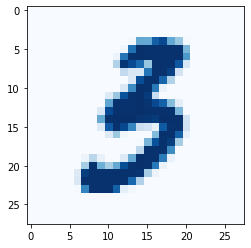

Model Prediction: 3


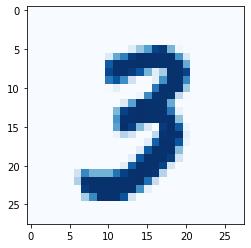

Model Prediction: 3


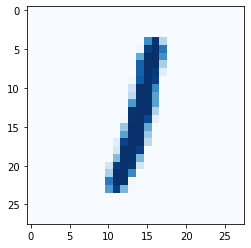

Model Prediction: 1


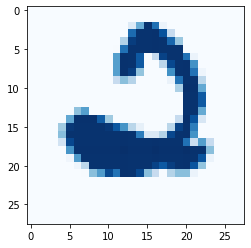

Model Prediction: 2


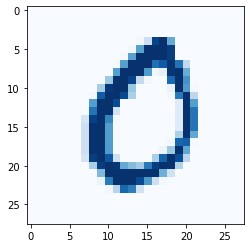

Model Prediction: 0


In [ ]:
for x in range(5):
    plt.imshow(x_test[random_test_data[x]].reshape(28,28),cmap='Blues')
    plt.show()
    predictions = model.predict_classes(x_test[random_test_data[x]].reshape(1,28,28,1))
    print('Model Prediction:', predictions[0])